# **EDA & Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('data/Clients_Ecommerce.csv')


### **1.   EDA**

In [ ]:
#We delete the qualitative variables, because we want to apply the linear regression model.
df=df.drop(['Email','Address','Avatar'], axis=1)

In [ ]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.shape

(500, 5)

In [ ]:
df.dtypes

,0
Avg. Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462  


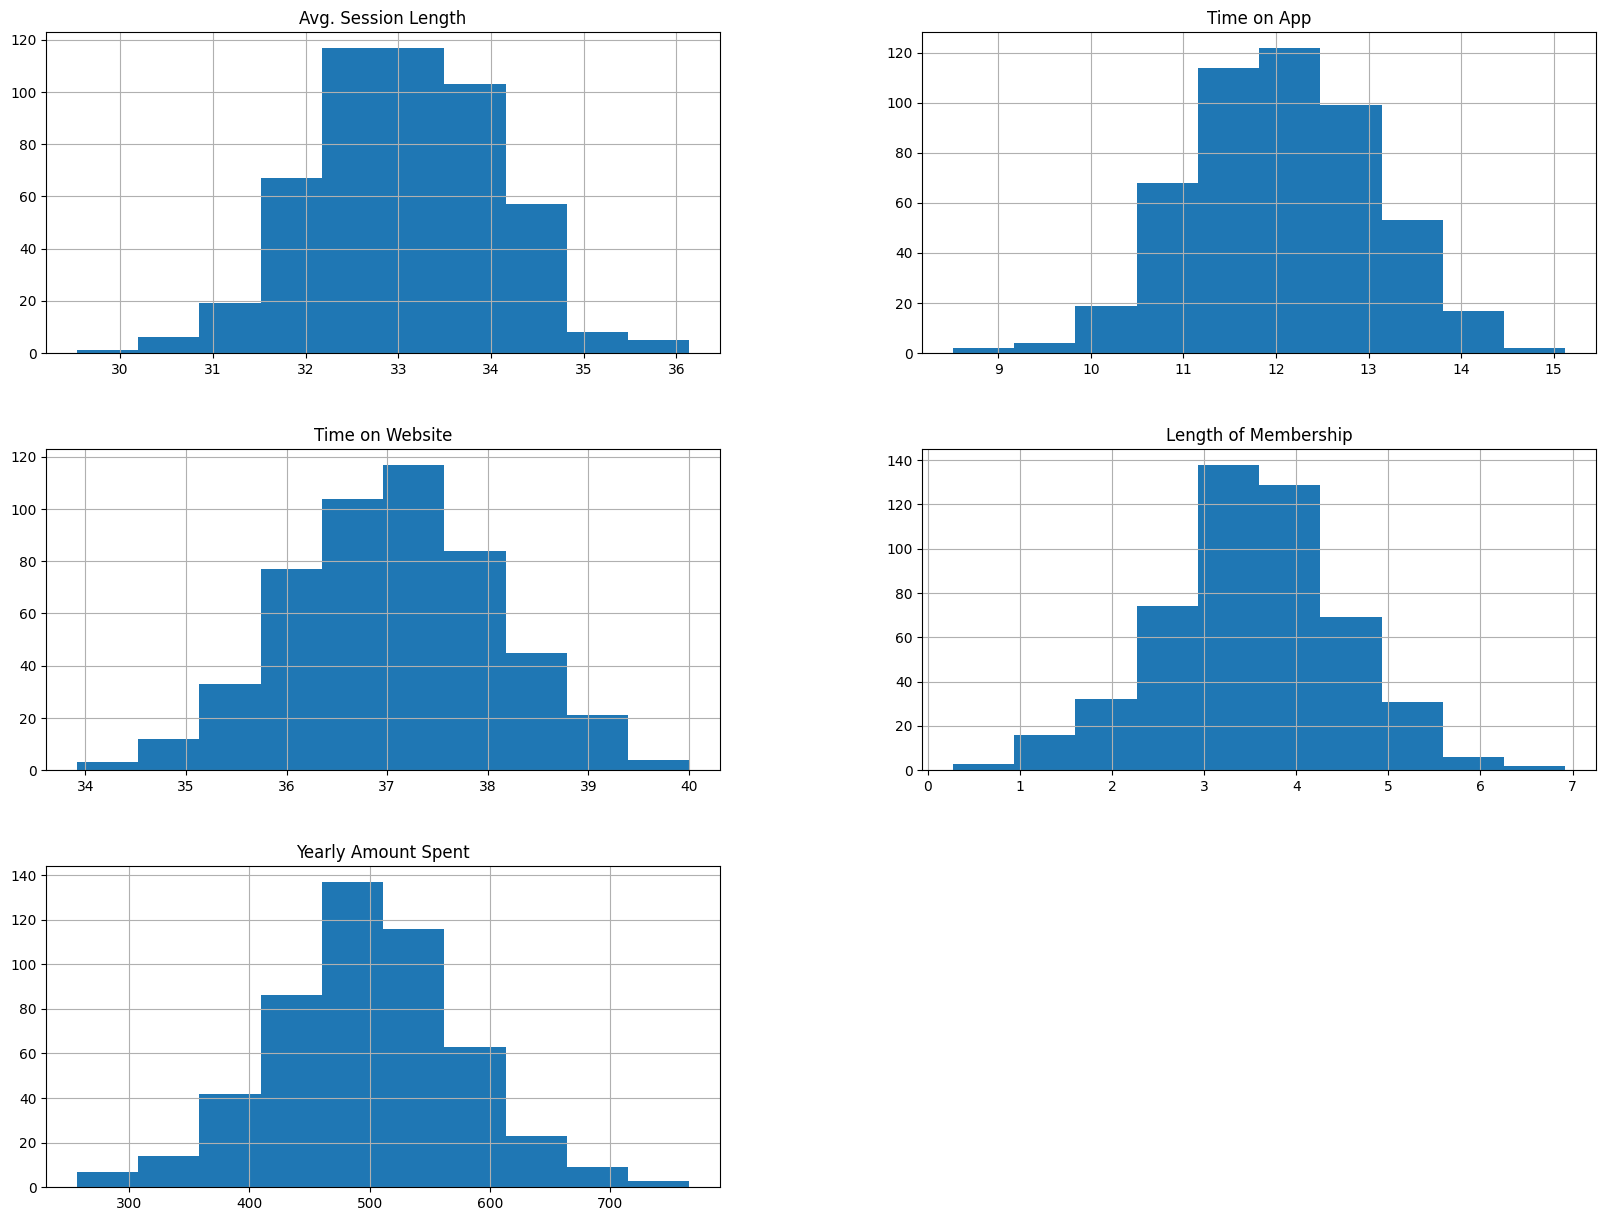

In [ ]:
#shows summary statistics (mean, std, min, max, quartiles) for each numerical column
print(df.describe())
#plots histograms for all the features to visualize their distributions
df.hist(figsize=(20,15))
plt.show()

<Axes: >

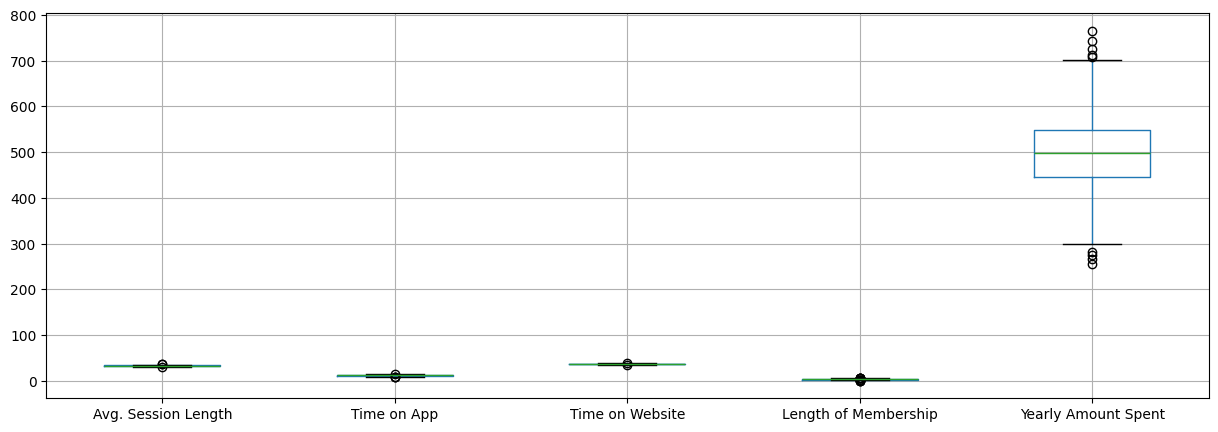

In [ ]:
#Visualize the distribution and the potential outliers
x=['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
df.boxplot(x,figsize=(15,5))

**In the graph above, we can clearly see that values ​​above the max or below the min act as outliers.**


array([[<Axes: xlabel='Avg. Session Length', ylabel='Avg. Session Length'>,
        <Axes: xlabel='Time on App', ylabel='Avg. Session Length'>,
        <Axes: xlabel='Time on Website', ylabel='Avg. Session Length'>,
        <Axes: xlabel='Length of Membership', ylabel='Avg. Session Length'>,
        <Axes: xlabel='Yearly Amount Spent', ylabel='Avg. Session Length'>],
       [<Axes: xlabel='Avg. Session Length', ylabel='Time on App'>,
        <Axes: xlabel='Time on App', ylabel='Time on App'>,
        <Axes: xlabel='Time on Website', ylabel='Time on App'>,
        <Axes: xlabel='Length of Membership', ylabel='Time on App'>,
        <Axes: xlabel='Yearly Amount Spent', ylabel='Time on App'>],
       [<Axes: xlabel='Avg. Session Length', ylabel='Time on Website'>,
        <Axes: xlabel='Time on App', ylabel='Time on Website'>,
        <Axes: xlabel='Time on Website', ylabel='Time on Website'>,
        <Axes: xlabel='Length of Membership', ylabel='Time on Website'>,
        <Axes: xlabel='

<Figure size 1850x1050 with 0 Axes>

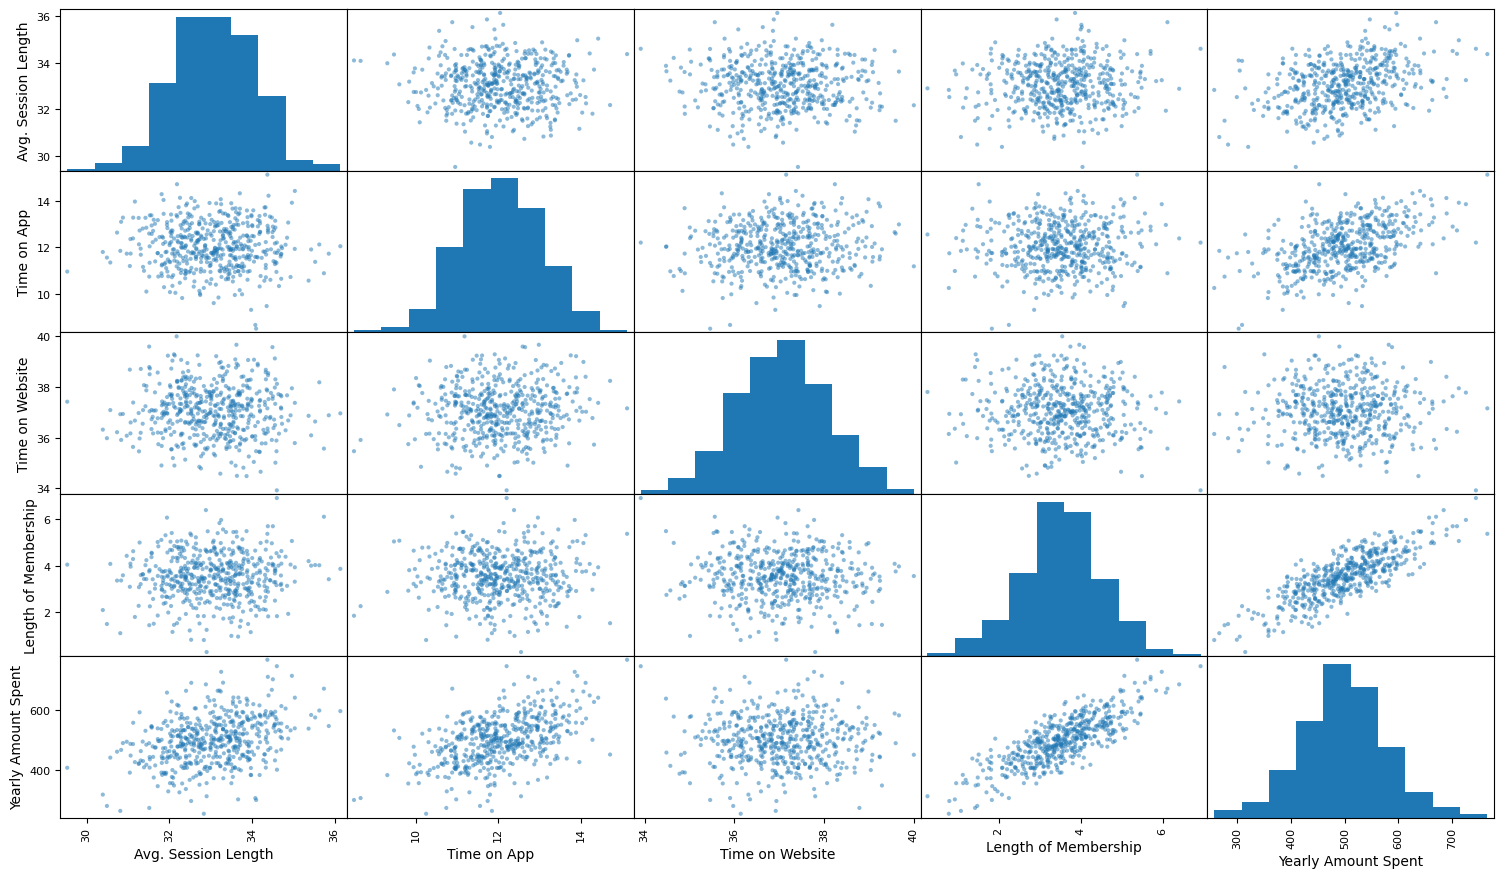

In [ ]:
#create a scatter matrix (pair plot) for all features in the dataframe to examine relationships and correlations
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
pd.plotting.scatter_matrix(df,figsize=(18.5,10.5),grid=True)

In [ ]:
#Vizualize the correlation between variables
corr_mat=df.corr()
corr_mat.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.0,-0.028,-0.035,0.06,0.36
Time on App,-0.028,1.0,0.082,0.029,0.5
Time on Website,-0.035,0.082,1.0,-0.048,-0.0026
Length of Membership,0.06,0.029,-0.048,1.0,0.81
Yearly Amount Spent,0.36,0.5,-0.0026,0.81,1.0


**"Length of Membership" is strongly positively correlated with "Yearly Amount Spent", making it an important predictor for the regression model.**

/tmp/ipython-input-3276933481.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipython-input-3276933481.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipython-input-3276933481.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

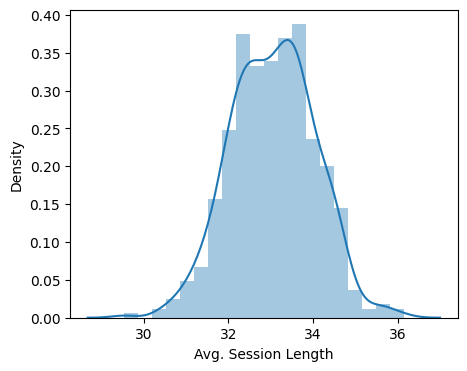

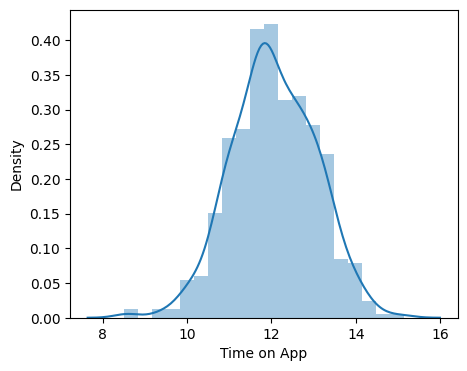

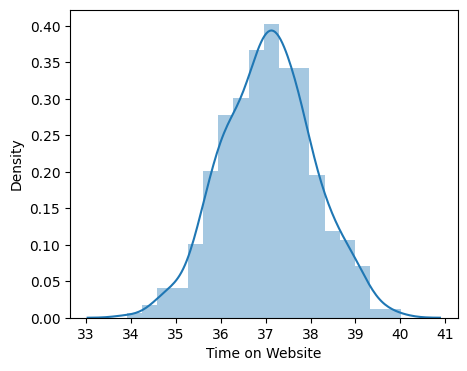

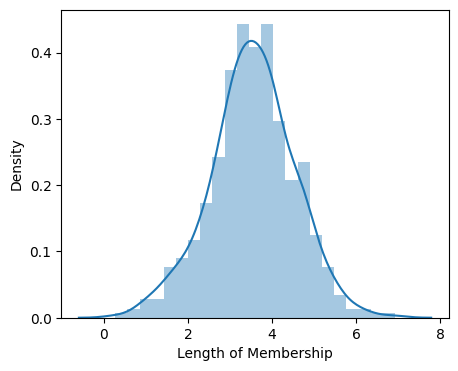

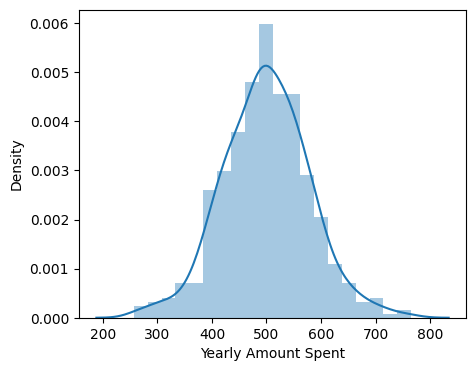

In [ ]:
#plot the distribution of each feature in the dataframe
for i in df:
  plt.figure(figsize=(5,4))
  sns.distplot(df[i])

**The variables are approximately normally distributed, which is beneficial for many regression models and statistical methods, as it helps improve model performance and stability**

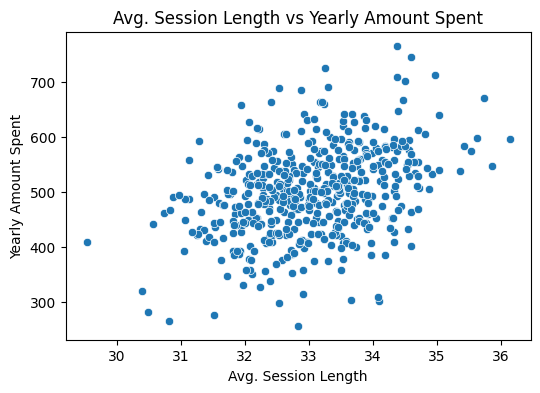

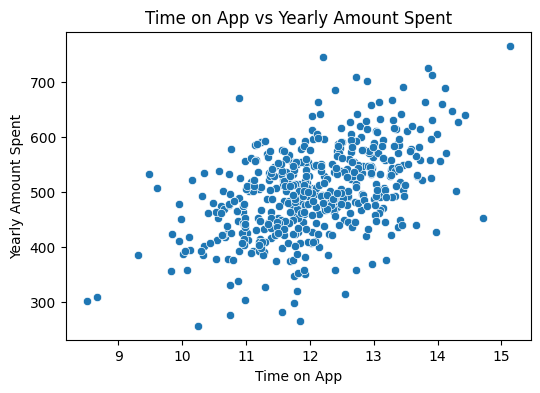

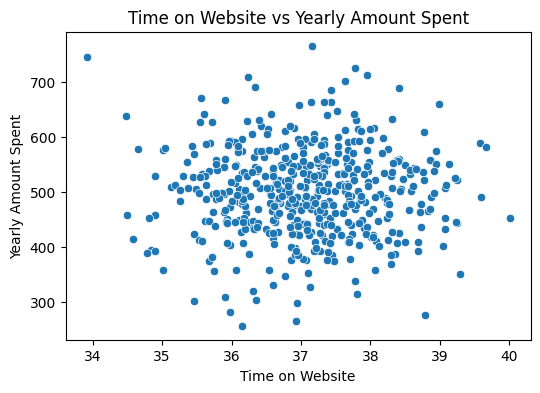

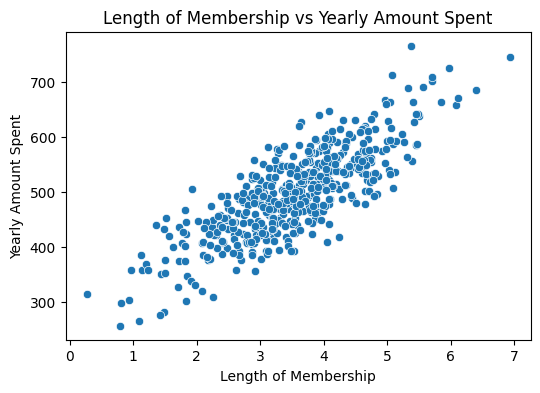

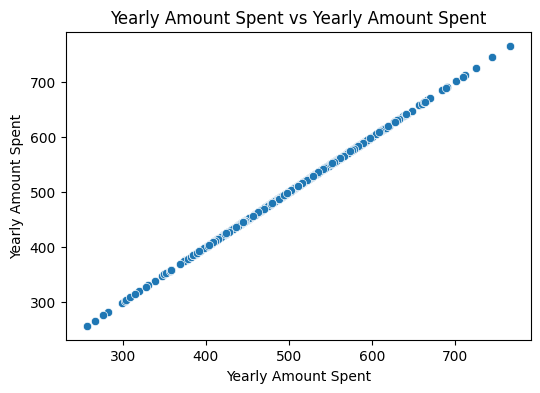

In [ ]:
# Visualize the relationship between each feature in the dataframe and the target variable "Yearly Amount Spent":
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Yearly Amount Spent'])
    plt.title(f"{col} vs Yearly Amount Spent")
    plt.show()

### **2.   Data Preprocessing**

In [ ]:
#Check for missing  values
print(f"Number of missing values for each variable:")
df.isna().sum()

Number of missing values for each variable:


,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


**No missing values in the dataset**

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**No duplicates in the dataset**

In [ ]:
##standardizes the numerical features using StandardScaler.
# Standardization ensures all features are on the same scale, which is important for regression models to prevent features with larger scales from dominating the predictions.
cols =  ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']
df = df[cols]
sc = StandardScaler()
df[cols] = sc.fit_transform(df[cols])